<center>
<cite>El ejercicio fue implementado en <b>Júpyter Notebook</b>
Se adjunta el archivo formato csv en el repositorio para su uso</cite><br>
<h1>Algoritmo de regresión Lineal simple</h1></center></br>
<p>El análisis de regresión lineal, en general, nos permite obtener una función lineal de una o más variables independientes o predictoras (X1, X2, ... XK) a partir de la cual explicar o predecir el valor de una variable dependiente o criterio (Y). En el análisis de regresión lineal podemos diferenciar entre análisis de regresión lineal simple y análisis de regresión lineal múltiple. En el primero, se intenta explicar o predecir la variable dependiente Y a partir de una única variable independiente, X1; mientras que en el segundo, contamos con un conjunto de variables independientes, X1, X2, ... XK, para estimar la variable dependiente Y. En ambos casos, tanto la variable dependiente como la/s independiente/s están medidas en escala de intervalo o de razón <cite>(Montgomery,Peck & Vining G.2006)</cite></p><br>
<h2>Implementación del algoritmo</h2><br>
El algoritmo se implementa en el siguiente contexto: Si tiene un archivo en formato csv el cual contiene diferentes urls de articulos, de entrada se obtienen en las columnas los siguientes datos, (ver figura 1)
<img src="https://i0.wp.com/www.aprendemachinelearning.com/wp-content/uploads/2018/05/reg_lineal_filas_iniciales.png" width="900px">

<p class="text-justify">Con base a los datos expuesto del articulo se hace una predicción para saber cuantas veces será compartido en redes sociales</p>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#Se obtinen los datos 
data = pd.read_csv("./articulos_ml.csv")

In [18]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values  
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

In [15]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data['# Shares'].values

In [16]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [ 5.69765366]
Independent term: 
 11200.3032231
Mean squared error: 372888728.34
Variance score: 0.06


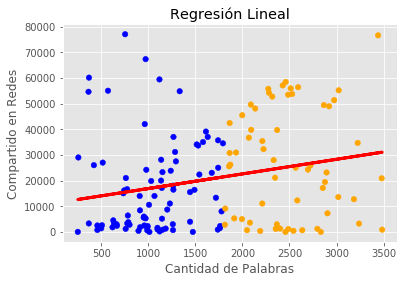

In [19]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [20]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595
